In [1]:
import json

with open('/Users/esrasekerci/Desktop/IS584/project/dataset/ICLR_2017/ICLR_2017_content/ICLR_2017_1_content.json', 'r') as f:
    data = json.load(f)

# Check if 'sections' exist
sections = data.get('metadata', {}).get('sections', [])

# Section count
section_count = len(sections)

# Word count
word_count = sum(len(section['text'].split()) for section in sections if 'text' in section)

print(f"Section Count: {section_count}")
print(f"Word Count: {word_count}")

Section Count: 30
Word Count: 9406


In [2]:
import os
import pandas as pd
from tqdm import tqdm

# Base path where your content JSON files are stored
base_content_path = '/Users/esrasekerci/Desktop/IS584/project/dataset/'  # adjust if needed

# Initialize lists to collect data
paper_ids = []
section_counts = []
word_counts = []

# Recursively walk through all subdirectories
for root, dirs, files in tqdm(os.walk(base_content_path)):
    for filename in files:
        if filename.endswith('_content.json'):
            file_path = os.path.join(root, filename)

            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)

                sections = data.get('metadata', {}).get('sections', [])

                if sections:
                    num_sections = len(sections)
                    num_words = sum(len(section.get('text', '').split()) for section in sections)
                else:
                    num_sections = 0
                    num_words = 0

                paper_ids.append(filename.replace('_content.json', ''))
                section_counts.append(num_sections)
                word_counts.append(num_words)

            except Exception as e:
                print(f"Error reading {filename}: {e}")
                continue

content_df = pd.DataFrame({
    'paper_id': paper_ids,
    'section_count': section_counts,
    'word_count': word_counts
})

print("=== Paper Content EDA Summary ===")
print(content_df.describe())

content_df.to_csv('content_eda_summary.csv', index=False)

34it [00:06,  5.54it/s]

=== Paper Content EDA Summary ===
       section_count    word_count
count    8855.000000   8855.000000
mean       14.873179   5485.031056
std         6.931239   2143.074677
min         0.000000      0.000000
25%        11.000000   4348.000000
50%        14.000000   4973.000000
75%        18.000000   5951.000000
max       254.000000  42107.000000


In [3]:
# Papers with missing full text
missing_full_text = content_df[(content_df['section_count'] == 0) & (content_df['word_count'] == 0)]
print(f"Number of papers with missing full text: {len(missing_full_text)}")

Number of papers with missing full text: 2


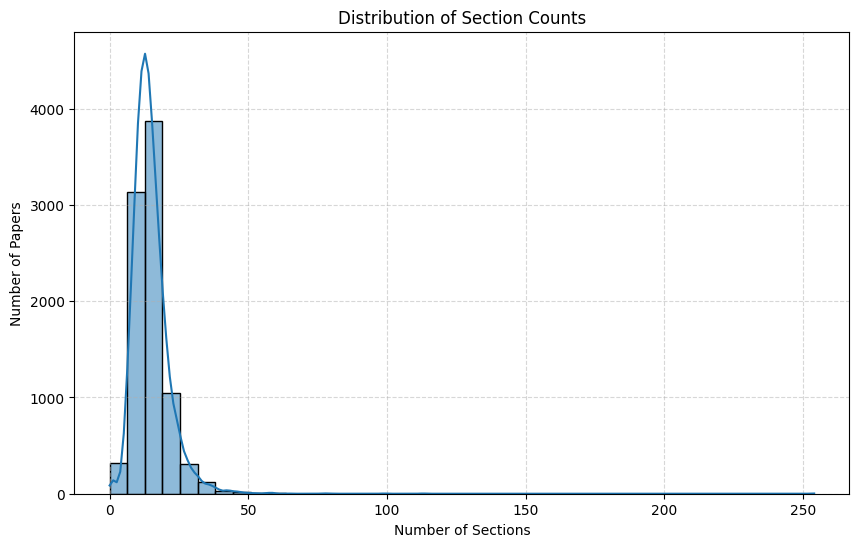

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(content_df['section_count'], bins=40, kde=True)
plt.title('Distribution of Section Counts')
plt.xlabel('Number of Sections')
plt.ylabel('Number of Papers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


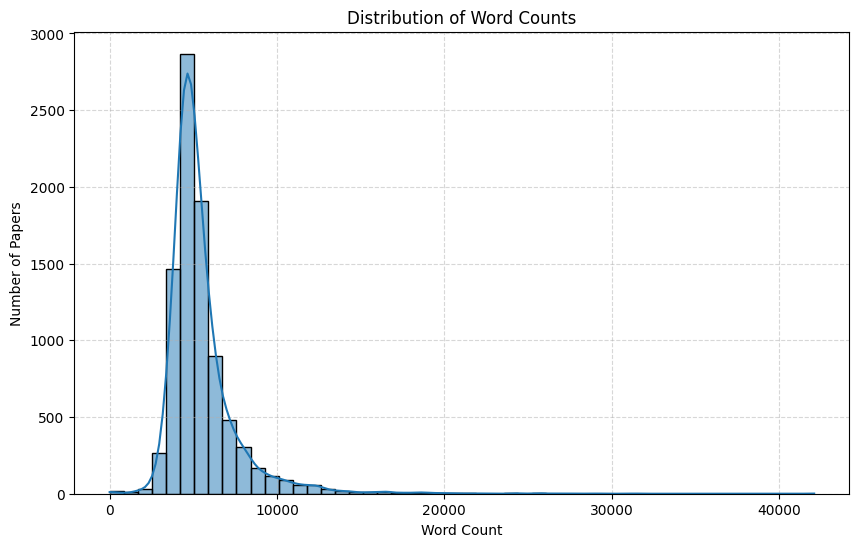

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(content_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Papers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

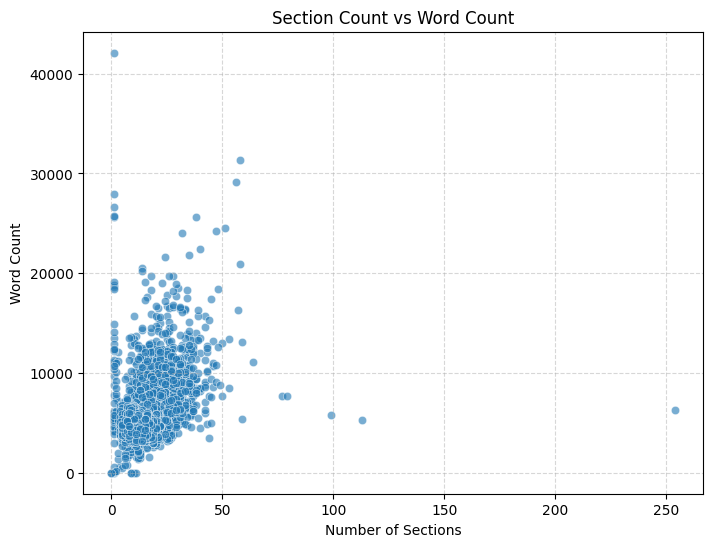

Pearson correlation between section count and word count: 0.403 (p-value=0.00000)


In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='section_count', y='word_count', data=content_df, alpha=0.6)
plt.title('Section Count vs Word Count')
plt.xlabel('Number of Sections')
plt.ylabel('Word Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Pearson correlation
from scipy.stats import pearsonr
corr, pval = pearsonr(content_df['section_count'], content_df['word_count'])
print(f"Pearson correlation between section count and word count: {corr:.3f} (p-value={pval:.5f})")

In [7]:
# Function to identify outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for 'word_count'
word_count_outliers, wc_lower, wc_upper = detect_outliers_iqr(content_df, 'word_count')
print(f"Outliers in word count: {len(word_count_outliers)} papers")
print(f"Word Count Outlier Thresholds: Lower < {wc_lower:.2f}, Upper > {wc_upper:.2f}")

# Detect outliers for 'section_count'
section_count_outliers, sc_lower, sc_upper = detect_outliers_iqr(content_df, 'section_count')
print(f"Outliers in section count: {len(section_count_outliers)} papers")
print(f"Section Count Outlier Thresholds: Lower < {sc_lower:.2f}, Upper > {sc_upper:.2f}")

Outliers in word count: 649 papers
Word Count Outlier Thresholds: Lower < 1943.50, Upper > 8355.50
Outliers in section count: 296 papers
Section Count Outlier Thresholds: Lower < 0.50, Upper > 28.50


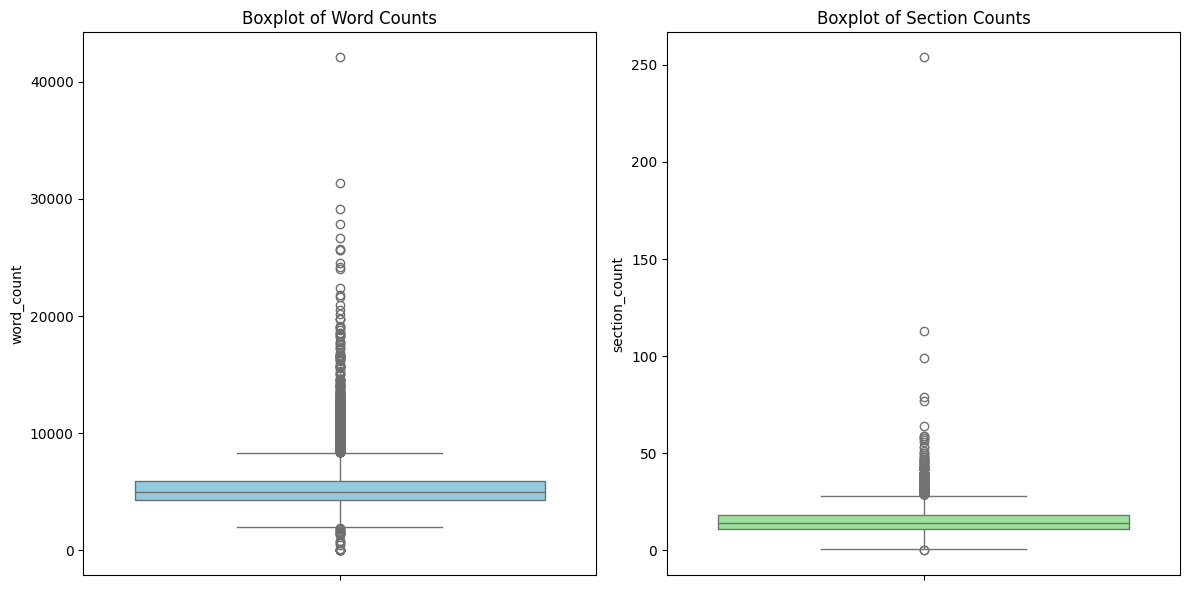

In [8]:
plt.figure(figsize=(12,6))

# Word Count Boxplot
plt.subplot(1,2,1)
sns.boxplot(y=content_df['word_count'], color='skyblue')
plt.title('Boxplot of Word Counts')

# Section Count Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=content_df['section_count'], color='lightgreen')
plt.title('Boxplot of Section Counts')

plt.tight_layout()
plt.show()